Do not `from iant_example_module import *`: It pollutes the global namespace.
To elaborate: The module file `ant.py` has a global namespace as does any Python
...um... "entity?" Anyway a namespace is a type of dictionary that maps a string 
to an address of some code. The global namespace of a module coexists with the 
global namespace of this notebook. Their intersection is the empty set. The module 
of interest is `ant.py` and the notebook is let us say `b.ipynb`. The first line 
of code in `ant.py` is `from math import cos`. When this runs (for example when
Python executes an `import` in `b.ipynb`) the global namespace will have a new 
dictionary entry. Its key will be `cos` and its value will be a pointer to the 
(sole) copy of the cosine function code in this little Python universe.


And so on: The remaining lines of `ant.py` will run in sequence. Perhaps there is 
some code in this file that we *do not* want to run at this time. Maybe it is 
code used to test the module function. Look up the rules for __init__ == "__main__"
as the means to *not* run that code.

Back to the global namespace populated by the module execution: This creates perhaps
some functions and classes and variables and so on; `fn()` and `x = 7` for example.
When this process finishes we have the global namespace of `ant` after `b.ipynb` 
executes `import ant`. Now in `b.ipynb`'s global namespace there exists all 
of `ant`'s global namespace as `ant.cos` and `a.fn` and `a.x`. No collisions. 

This is why instead of `from ant import *` we say...

In [ ]:
import ant

In [ ]:
# To list available functions in the ant module: type ant., Tab
# Docstring for the module: type ant., Shift + Tab
ant.

## Problem 0: Bonus Fouriet transform problem!

Show empirically that that the totient is the discret Fourier transform of the gcd evaluated at $1$.
This claim I found in Wikipedia on the [Euler's totient](https://en.wikipedia.org/wiki/Euler%27s_totient_function#Fourier_transform) entry.


The Fourier Transform applied to a vector $[ x ]$ with a control parameter $m$ is


$\begin{align}xyz\end{align}$

## Problem 2.1c) Find n for which $\varphi(n)$ = 12

In [2]:
for n in range(1, 100):
    if ant.Totient(n) == 12: print(n, ant.Totient(n))

13 12
21 12
26 12
28 12
36 12
42 12


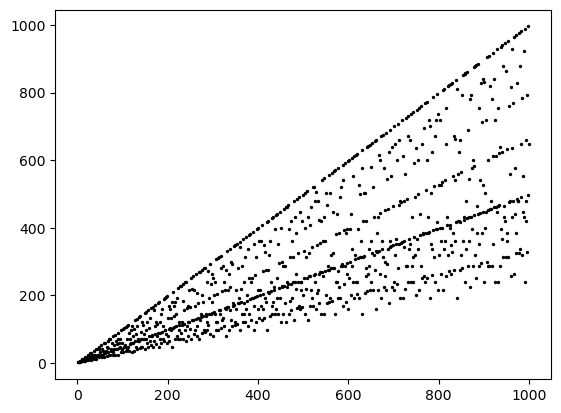

In [5]:
from matplotlib import pyplot as plt
x, y = [], []
for i in range(1, 1000):
    x.append(i)
    y.append(ant.Totient(i))
plt.scatter(x, y, c='k', s=2)

## Problem 2.5

Show the Dirichlet product of the Mobius function and $\nu(n)$ (the number of unique prime factors of $n$) is $1$ or $0$.

In [3]:
# empirical check establishes the pattern: n = prime gives 1, 0 otherwise
for n in range(1, 100000, 1):
    if n < 11:                                                           print(n, ant.Dirichlet(ant.Mobius, ant.Nu, n))
    elif ant.prime(n) and not ant.Dirichlet(ant.Mobius, ant.Nu, n) == 1: print("Prime anomaly at", n)
    elif not ant.prime(n) and ant.Dirichlet(ant.Mobius, ant.Nu, n):      print("Composite anomaly at", n)

1 0
2 1
3 1
4 0
5 1
6 0
7 1
8 0
9 0
10 0


In [4]:
total0, total1, totalOther, n = 0, 0, 0, 6000
for i in range(1, n+1): 
    product     = ant.Dirichlet(ant.Mobius, ant.Nu, i)
    if product == 0:   total0 += 1
    elif product == 1: total1 += 1
    else:              totalOther += 1
        
print(total0, 'zeros,', total1, 'ones,', totalOther, 'something-elses')

5217 zeros, 783 ones, 0 something-elses


#### 2.9 Extending the totient $\varphi$ for $x \in \mathbb{R}$

This problem involves two arguments to the extended totient: A real $x$
and our usual integer $n$. So let's try and establish the pattern of
behavior by observation.


Problem: Suppose $x \in R$, $x \ge 1$: Let $\varphi(x, n)$ denote the number of positive integers $\le x$ that are relatively prime to $n$.
(Notice no qualification of $n$ in relation to $x$.)


a) Show $\varphi(x, n) = \sum_{d|n} \mu(d) \lfloor \frac{x}{d} \rfloor$.


b) Show $\sum_{d|n} \varphi(\frac{x}{d}, \frac{n}{d}) = \lfloor x \rfloor$.

In [4]:
test_x_values = [1.2, 2.2, 4.2, 6.2, 17.2]
test_n_values = [1, 6, 16, 21]

# print("\nx, n, ex-tot\n")

# part a) Extended totient
part_a_exception = False
for n in test_n_values:
    for x in test_x_values:
        extended_totient = ant.ExtendedTotient(x, n)
        to_prove_sum = 0
        for d in ant.divisors(n):
            to_prove_sum += ant.Mobius(d) * ant.floor(x/d)
        # print(x, n, extended_totient)
        if not extended_totient == to_prove_sum:
            part_a_exception = True
            print("Exception, part a:", n, x, extended_totient, to_prove_sum)
            
if not part_a_exception: print("\nPart a) test passed\n")
else: print("\nPart a) test failed\n")
                  
# part b)
print('when part b) hits a case of x/d < 1: Do a diagnostic print with these columns:')
print('n, x, [x], d, x/d, n//d, x-totient(x/d, n/d)\n')

part_b_exception = False
for n in test_n_values:
    for x in test_x_values:
        extended_totient_sum = 0
        for d in ant.divisors(n):
            extended_totient_sum += ant.ExtendedTotient(x/d, n/d)
            if (x/d < 1): print(n, x, ant.floor(x), d, round(x/d, 3), n//d, ant.ExtendedTotient(x/d, n/d))
        if not extended_totient_sum == ant.floor(x):
            part_b_exception = True
            print("Exception, part b:", n, x, extended_totient_sum, ant.floor(x))
        
if not part_b_exception: print("\nPart b) test passed\n")
else: print("\nPart b) test failed\n")


Part a) test passed

when part b) hits a case of x/d < 1: Do a diagnostic print with these columns:
n, x, [x], d, x/d, n//d, x-totient(x/d, n/d)

6 1.2 1 2 0.6 3 0
6 1.2 1 3 0.4 2 0
6 1.2 1 6 0.2 1 0
6 2.2 2 3 0.733 2 0
6 2.2 2 6 0.367 1 0
6 4.2 4 6 0.7 1 0
16 1.2 1 2 0.6 8 0
16 1.2 1 4 0.3 4 0
16 1.2 1 8 0.15 2 0
16 1.2 1 16 0.075 1 0
16 2.2 2 4 0.55 4 0
16 2.2 2 8 0.275 2 0
16 2.2 2 16 0.138 1 0
16 4.2 4 8 0.525 2 0
16 4.2 4 16 0.263 1 0
16 6.2 6 8 0.775 2 0
16 6.2 6 16 0.388 1 0
21 1.2 1 3 0.4 7 0
21 1.2 1 7 0.171 3 0
21 1.2 1 21 0.057 1 0
21 2.2 2 3 0.733 7 0
21 2.2 2 7 0.314 3 0
21 2.2 2 21 0.105 1 0
21 4.2 4 7 0.6 3 0
21 4.2 4 21 0.2 1 0
21 6.2 6 7 0.886 3 0
21 6.2 6 21 0.295 1 0
21 17.2 17 21 0.819 1 0

Part b) test passed



### Problem 2.9 continued


From looking into part b) by hand: The sum of extended totients works as advertised; but the 
extended totient is passed real argument $x/d < 1$, a consequence of allowing $x < n$. 
Example: $x = 17$, $n = 21$: $d = \{ 1, 3, 7, 21 \}$ and extended totient argument pairs
are $(17, 21), \ (5.67, 7), \ (2.43, 3), \ (.81, 1)$.
The extended totient returns zero in such cases; and this does not alter the
sum. So define the extended totient to be zero for $x < 1$ and everything is fine.





## Problem 2.12


If $f(n) > 0$ for all $n$ and if $a(n)$ is real with $a(1) \ne 0$, prove that


$
\begin{align}
g(n) =  \prod_{d|n}f(d)^{a(\frac{n}{d})} \;\; \textrm{ if and only if } \;\; f(n)=\prod_{d|n}g(d)^{a^{-1}(\frac{n}{d})},
\end{align}
$

In [4]:
print(divisors(30))

[1, 2, 3, 5, 6, 10, 15, 30]


In [5]:
print(Totient(1))
print(Totient(2))
print(Totient(3))
print(Totient(4))
print(Totient(15))
print(Totient(30))
print(Totient(60))
print(Totient(2400))

1
1
2
2
8
8
16
640


In [6]:
print(GeneralizedTotient(1, 1))
print(GeneralizedTotient(1, 2))
print(GeneralizedTotient(1, 3))
print(GeneralizedTotient(1, 4))
print(GeneralizedTotient(1, 15))
print(GeneralizedTotient(1, 30))
print(GeneralizedTotient(1, 60))
print(GeneralizedTotient(1, 2400))

print(GeneralizedTotient(0, 1))
print(GeneralizedTotient(0, 2))
print(GeneralizedTotient(0, 3))
print(GeneralizedTotient(0, 4))
print(GeneralizedTotient(0, 15))
print(GeneralizedTotient(0, 30))
print(GeneralizedTotient(0, 60))
print(GeneralizedTotient(0, 2400))

print(GeneralizedTotient(2, 1))
print(GeneralizedTotient(2, 2))
print(GeneralizedTotient(2, 3))
print(GeneralizedTotient(2, 4))
print(GeneralizedTotient(2, 15))
print(GeneralizedTotient(2, 30))
print(GeneralizedTotient(2, 60))
print(GeneralizedTotient(2, 2400))

1
1
3
4
60
120
480
768000
1
1
2
2
8
8
16
640
1
1
5
10
620
2360
19120
1228796800


## 2.15 Prove an equality involving a sum of generalized Euler totient functions. 


Totient $\varphi (n)$ is the number of relative primes less than $n$. 


Generalized totient $\varphi_k(n) = \sum_{m<n \textrm{ and } (m,n)=1}m^k$.


When $k=0$ we have $\varphi_{0}(n) = \varphi (n)$.


For $k=2$ and $n=7$ we have relative primes $1, 2, 3, 4, 5, 6$ and $\varphi_2(7) = 1^2 + 2^2 + 3^2 + 4^2 + 5^2 + 6^2$. 


Problem: Show 


$\begin{align}\sum_{d|n} \frac{\varphi_k(d)}{d^k} = \frac{1^k + 2^k + \cdots + n^k}{n^k}\end{align}$


The following code shows that equality holds pretty reliably... maybe with the occasional Python rounding error.

In [18]:
first_n = 1
last_n = 60
first_k = 0
last_k = 5
precision = 3
for n in range(first_n, last_n + 1,1):
    for k in range(first_k, last_k + 1, 1):
        lhs_sum = 0
        for d in ant.divisors(n): lhs_sum += ant.GeneralizedTotient(k, d) / d**k
        rhs_sum = 0
        for i in range(1, n+1, 1): rhs_sum += i**k
        rhs = rhs_sum / (n**k)
        
        ratio_sum = round(lhs_sum, precision)
        sum_ratio = round(rhs, precision)
        if not ratio_sum == sum_ratio: 
            print("ERROR...........")
            print(n, k, ratio_sum, sum_ratio)

ERROR...........
20 3 5.512 5.513


## Problem 2.13

This problem is thematic to chapters 1 and 2 as it brings together several important ideas. The problem 
is easily solved by Chip Hurst in a couple of lines but I belabor matters.


The problem is advertised as "*The product form of the Mobius inversion formula*": 
Start with a function $f(n) > 0 \; \forall \; n$ and a second real-valued function $a(n)$ 
where $a(1) \ne 0$. Show that 


$\begin{align}
\large{g(n)=\prod_{d|n}{f(d)^{a(n/d)}} \; \iff \; f(n)=\prod_{d|n}{g(d)^{a^{-1}(n/d)}}.}
\end{align}$


The exponentiation is not a typo! Here $a$ and $a^{-1}$ are Dirichlet inverse functions. 
(The problem statement in the text uses $b$ in place of $a^{-1}$.)


***Note: Mobius inversion sets up a relationship between two functions f and g
via the Mobius function. This is not the same thing as Dirichlet inversion 
where $f * f^{-1} = f^{-1} * f = I.$***


Zeroth belabor: Confirm the recursive formula for the Dirichlet inverse for $f(n) = n$.


First belabor: Demonstrate the unit function u(n) = 1 is the Dirichlet inverse of 
the Mobius function.

Second belabor: The Mobius Inversion Formula presents a function's inverse
in terms of a sum involving the Mobius function. This can be recursively substituted 
to give the function in terms of itself. Check this
empirically using $f(n) = n$.


Third belabor: With $f$ as above and defining the second function $a$ the same as
$f$: $a(n)=n$: Does the product form of the Mobius Inversion Formula yield $f$ via $g$?


In [8]:
# Zeroth Belabor

print("Problem 2.13 on the product form of the Mobius Inversion Formula...            ")
print("   Part 0: Show the Dirichlet inverse by recursion works properly (gives I).   ")
print("                                                                               ")
print("Let's use the function f(n) = N(n) = n                                         ")
print("  Recall that the identity function is [1, 0, 0, 0, ...] = I                   ")
print("  The Dirichlet product of a function and its inverse gives I (commutative).   ")
print("                                                                               ")
print("  f-1(1) = 1/f(1); and then for n > 1:                                         ")
print("  f-1(n) = -1/f(1) multiplied by S where                                       ")
print("                                                                               ")
print(" S = sum over d divides n, d less than n: Of E where                           ")
print("                                                                               ")
print(" E = f(n/d) multiplied by f-1(d). Noting d < n is key to recursion.            ")
print("                                                                               ")

test_n = 35
F      = [ant.N(n) for n in range(test_n + 1)]      # F holds values of f in the recursive space from 1 to test_n
                                                    #   Note the list indices match n and we ignore F[0]
G      = [0, 1/F[1]]                                # G[] will be the inverse of F built recursively, also with 'ignore 0' indexing
    
print('The list length of G should be two elements: ' + str(len(G)))
print()

# here the recursion formula calculates values of G.
#   each value is a sum (so there is an inner loop)
#   and the recursion proceeds from 1 to test_n (outer loop)

G = [0]
G.append(1/F[1])
leading_coefficient = -1/F[1]
for n in range(2, test_n + 1):
    S = 0
    for d in ant.divisors_less_n(n): S += ant.N(n//d)*G[d]
    G.append(leading_coefficient * S)
    
print("Confirmation of Dirichlet inverse:")
print()
print("The function f(n) is in list F: " + str(F[1:]))
print("The function f-1(n) is in list G: " + str(G[1:]))
print()
print("Confirm their product is I: ")
print(ant.ScanningListDirichlet(F, G)[1:])
print(ant.ScanningListDirichlet(G, F)[1:])
print()


Problem 2.13 on the product form of the Mobius Inversion Formula...            
   Part 0: Show the Dirichlet inverse by recursion works properly (gives I).   
                                                                               
Let's use the function f(n) = N(n) = n                                         
  Recall that the identity function is [1, 0, 0, 0, ...] = I                   
  The Dirichlet product of a function and its inverse gives I (commutative).   
                                                                               
  f-1(1) = 1/f(1); and then for n > 1:                                         
  f-1(n) = -1/f(1) multiplied by S where                                       
                                                                               
 S = sum over d divides n, d less than n: Of E where                           
                                                                               
 E = f(n/d) multiplied by f-1(d). Noting

In [20]:
# First belabor: Show the unit function U and the Mobius function are Dirichlet inverses
mu, u = [0], [0]
for n in range(1, test_n + 1):
    mu.append(ant.Mobius(n))
    u.append(ant.U(n))
    
print(ant.ScanningListDirichlet(mu, u)[1:])

[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [22]:
# Second belabor: Show that the Mobius Inversion Formula returns f by substitution:
#   Suppose some arithmetic function f is equal to the sum over the divisors of n of some function g(d).
#   Then g(n) is f * mu. The plan is to calculate g and show it generates f.
    
GMob = [0]
for n in range(1, test_n + 1):
    GMob.append(ant.Dirichlet(ant.N, ant.Mobius, n))

FRegen = [0]
for n in range(1, test_n + 1):
    FRegen.append(ant.ListDirichlet(GMob, u, n))

print(F[1:])
print(GMob[1:])
print()
print("        (by the way that looks an awful lot like the totient...)")
print()
print("Confirm F is recovered as N(n): ")
print(FRegen[1:])
print()

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35]
[1, 1, 2, 2, 4, 2, 6, 4, 6, 4, 10, 4, 12, 6, 8, 8, 16, 6, 18, 8, 12, 10, 22, 8, 20, 12, 18, 12, 28, 8, 30, 16, 20, 16, 24]

        (by the way that looks an awful lot like the totient...)

Confirm F is recovered as N(n): 
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35]



In [25]:
# Third belabor: Demonstrate that the product form of the Mobius Inversion Formula works as advertised.
#   First condition: f(n) > 0 for all n: Define f(n) = n as above.
#   Second condition: a(n) is real and a(1) is not zero: Set a(n) = n
#   Third condition: a-inv is the Dirichlet inverse of a(n): a-inv(n) = n times mu(n) (not a Dirichlet product).
#
#   Result to show: Define g as the product over divisors d: f(d) raised to the a(n/d); if and only if 
#       f is the product over divisors d of g(d) raised to the a-inv(n/d). 

def a(n): return ant.N(n)

def a_inverse(n): return ant.N(n)*ant.Mobius(n)

print(ant.Dirichlet(a, a_inverse, 3))      # Confirms result is I(n)

0


## 2.25

In [16]:
print("n     tot      mu      tot*mu      tm*m      I")
for n in range(1, 43):
    t = ant.Totient(n)
    m = ant.Mobius(n)
    d = ant.Dirichlet(ant.TotientMobiusProduct, ant.Totient, n)
    I = 1 if n == 1 else 0
    print(n, '     ', t, '     ', m, '     ', t*m, '     ', d, '     ', I)

n     tot      mu      tot*mu      tm*m      I
1       1       1       1       1       1
2       1       -1       -1       0       0
3       2       -1       -2       0       0
4       2       0       0       1       0
5       4       -1       -4       0       0
6       2       1       2       0       0
7       6       -1       -6       0       0
8       4       0       0       2       0
9       6       0       0       2       0
10       4       1       4       0       0
11       10       -1       -10       0       0
12       4       0       0       0       0
13       12       -1       -12       0       0
14       6       1       6       0       0
15       8       1       8       0       0
16       8       0       0       4       0
17       16       -1       -16       0       0
18       6       0       0       0       0
19       18       -1       -18       0       0
20       8       0       0       0       0
21       12       1       12       0       0
22       10       1       10     